In [60]:
import pandas as pd
from pathlib import Path
import osmnx as ox
import numpy as np

In [149]:
input_path = "C:/Users/ckaz3/Desktop/intersection-safety-infra-detection/data/raw/tod_database_download.csv"
station_data = pd.read_csv(input_path)
station_data = station_data[station_data["Latitude"] == 44.0884905]

In [150]:
from geopy import distance

In [182]:
intersection_data_list = []

for _, station_row in station_data.iterrows():
    try:
        station_local_network = ox.graph.graph_from_point(
            (station_row["Latitude"], station_row["Longitude"]),
            dist=250,
            dist_type="bbox",
            network_type="drive",
            retain_all=True,
        )
    except ValueError:
        continue
    except:
        print(
            "Unknown error with station:",
            (station_row["Latitude"], station_row["Longitude"]),
        )

    # iterate through nodes in new graph
    station_lat = station_row["Latitude"]
    station_lon = station_row["Longitude"]
    station_row = station_row.to_list()

    for _, intersection_data in station_local_network.nodes.items(): # type: ignore
        new_row = station_row.copy()
        intersection_lat = intersection_data["y"]
        intersection_lon = intersection_data["x"]
        print(intersection_lat, intersection_lon)
        if (
            distance.great_circle(
                (station_lat, station_lon), (intersection_lat, intersection_lon)
            ).meters
            <= 250
        ):
            new_row.extend([station_lat, station_lon])
            intersection_data_list.append(new_row)

44.0901049 -123.0350911
44.0884043 -123.033682
44.0872759 -123.035229
44.0870541 -123.0352027
44.0880739 -123.0351075
44.0882945 -123.0349966
44.08836 -123.0351994
44.0884735 -123.035167
44.0884799 -123.0349497
44.0885087 -123.035045
44.0883598 -123.0349084
44.0884039 -123.0344675
44.0886289 -123.0374615
44.0884326 -123.0358735
44.0899347 -123.0336782
44.088411 -123.0356462
44.0883171 -123.0351604
44.0872762 -123.0353376
44.0875089 -123.0352604
44.0870507 -123.0353557
44.0868202 -123.0352805


In [181]:
intersection_data_list

,Buffer,Agency,Line(s),Station Name,Year Opened,Station_Latitude,Station_Longitude,Inter_Latitude,Inter_Longitude
0,Existing Transit,Lane Transit District,EmX,International Center Station,2007,44.08849,-123.036349,44.08849,-123.036349
1,Existing Transit,Lane Transit District,EmX,International Center Station,2007,44.08849,-123.036349,44.08849,-123.036349
2,Existing Transit,Lane Transit District,EmX,International Center Station,2007,44.08849,-123.036349,44.08849,-123.036349
3,Existing Transit,Lane Transit District,EmX,International Center Station,2007,44.08849,-123.036349,44.08849,-123.036349
4,Existing Transit,Lane Transit District,EmX,International Center Station,2007,44.08849,-123.036349,44.08849,-123.036349
5,Existing Transit,Lane Transit District,EmX,International Center Station,2007,44.08849,-123.036349,44.08849,-123.036349
6,Existing Transit,Lane Transit District,EmX,International Center Station,2007,44.08849,-123.036349,44.08849,-123.036349
7,Existing Transit,Lane Transit District,EmX,International Center Station,2007,44.08849,-123.036349,44.08849,-123.036349
8,Existing Transit,Lane Transit District,EmX,International Center Station,2007,44.08849,-123.036349,44.08849,-123.036349
9,Existing Transit,Lane Transit District,EmX,International Center Station,2007,44.08849,-123.036349,44.08849,-123.036349


In [180]:
data_path = "C:/Users/ckaz3/Desktop/intersection-safety-infra-detection/data/interim/intersections.csv"
data = pd.read_csv(data_path)
data = data.drop("Unnamed: 0", axis=1)

print(len(data))
print(len(data.drop_duplicates()))

97530
5921


In [176]:
data_path = "C:/Users/ckaz3/Desktop/intersection-safety-infra-detection/data/interim/intersections.csv"
data = pd.read_csv(data_path)
data = data.drop("Unnamed: 0", axis=1)

print(len(data))

data = pd.concat((data, pd.DataFrame(intersection_data_list)), axis=0)

print(len(data))

print(len(data.drop_duplicates()))

97530
97550
5922


In [179]:
data

,Buffer,Agency,Line(s),Station Name,Year Opened,Station_Latitude,Station_Longitude,Inter_Latitude,Inter_Longitude
0,Existing Transit,ACE,Altamont Commuter Express,Lathrop/Manteca,Pre-2000,37.898890,-121.270330,37.898890,-121.270330
1,Existing Transit,ACE,Altamont Commuter Express,Lathrop/Manteca,Pre-2000,37.898890,-121.270330,37.898890,-121.270330
2,Existing Transit,ACE,Altamont Commuter Express,Livermore,Pre-2000,37.684456,-121.769663,37.684456,-121.769663
3,Existing Transit,ACE,Altamont Commuter Express,Livermore,Pre-2000,37.684456,-121.769663,37.684456,-121.769663
4,Existing Transit,ACE,Altamont Commuter Express,Livermore,Pre-2000,37.684456,-121.769663,37.684456,-121.769663
...,...,...,...,...,...,...,...,...,...
15,Existing Transit,Lane Transit District,EmX,International Center Station,2007,44.088490,-123.036349,44.088490,-123.036349
16,Existing Transit,Lane Transit District,EmX,International Center Station,2007,44.088490,-123.036349,44.088490,-123.036349
17,Existing Transit,Lane Transit District,EmX,International Center Station,2007,44.088490,-123.036349,44.088490,-123.036349
18,Existing Transit,Lane Transit District,EmX,International Center Station,2007,44.088490,-123.036349,44.088490,-123.036349


In [78]:
from tqdm import tqdm

In [84]:
test = data.columns.to_list()
test.extend(["hi", "bye"])
test[5:7] = ["one", "two"]
test
pd.DataFrame(columns=test)

for _, row in tqdm(data[:5].iterrows()):
    print(row["Latitude"])

5it [00:00, 4995.60it/s]

37.89889040557031
37.684456069622655
37.658465769915225
37.4068
37.9558


In [123]:
for row in data[(data["Agency"] == "MTA") & (data["Station Name"].str.startswith("42 St - P"))].iterrows():
    row = row[1]

In [139]:
G = ox.graph.graph_from_point((44.0884905, -123.0363493), dist=250, dist_type="bbox", network_type="drive")

In [141]:
station_local_network = ox.graph.graph_from_point(
    (44.0884905, -123.0363493),
    dist=250,
    dist_type="bbox",
    network_type="drive",
    retain_all=True,
)

In [140]:
G.nodes

NodeView((40079188, 40099749, 1042225256, 1042225294, 2264951001, 2264951026, 2264951045, 2264951052, 2264951057, 2264951060, 3500077320, 7949095205, 7949095285, 7949095290, 9072702285, 10294441933, 10299475845, 10299475847, 10299475853, 10299475857, 10299475859))

In [125]:
row.to_list()

['Existing Transit',
 'MTA',
 '8 Avenue Local(E), 8 Avenue Local(C), 8 Avenue Express(A)',
 '42 St - Port Authority Bus Terminal',
 'Pre-2000',
 40.757308,
 -73.989735]

In [128]:
node_data["y"]

40.7591595

In [133]:
new_rows = []
for _, node_data in G.nodes.items():
    new_row = row.to_list()
    new_row.extend([node_data["y"], node_data["x"]])
    new_rows.append(new_row)


pd.DataFrame(data=new_rows)

,0,1,2,3,4,5,6,7,8
0,Existing Transit,MTA,"8 Avenue Local(E), 8 Avenue Local(C), 8 Avenue...",42 St - Port Authority Bus Terminal,Pre-2000,40.757308,-73.989735,40.759160,-73.988386
1,Existing Transit,MTA,"8 Avenue Local(E), 8 Avenue Local(C), 8 Avenue...",42 St - Port Authority Bus Terminal,Pre-2000,40.757308,-73.989735,40.755330,-73.991177
2,Existing Transit,MTA,"8 Avenue Local(E), 8 Avenue Local(C), 8 Avenue...",42 St - Port Authority Bus Terminal,Pre-2000,40.757308,-73.989735,40.755949,-73.990728
3,Existing Transit,MTA,"8 Avenue Local(E), 8 Avenue Local(C), 8 Avenue...",42 St - Port Authority Bus Terminal,Pre-2000,40.757308,-73.989735,40.756567,-73.990276
4,Existing Transit,MTA,"8 Avenue Local(E), 8 Avenue Local(C), 8 Avenue...",42 St - Port Authority Bus Terminal,Pre-2000,40.757308,-73.989735,40.757233,-73.989791
5,Existing Transit,MTA,"8 Avenue Local(E), 8 Avenue Local(C), 8 Avenue...",42 St - Port Authority Bus Terminal,Pre-2000,40.757308,-73.989735,40.758532,-73.988843
6,Existing Transit,MTA,"8 Avenue Local(E), 8 Avenue Local(C), 8 Avenue...",42 St - Port Authority Bus Terminal,Pre-2000,40.757308,-73.989735,40.756036,-73.986949
7,Existing Transit,MTA,"8 Avenue Local(E), 8 Avenue Local(C), 8 Avenue...",42 St - Port Authority Bus Terminal,Pre-2000,40.757308,-73.989735,40.758433,-73.992646
8,Existing Transit,MTA,"8 Avenue Local(E), 8 Avenue Local(C), 8 Avenue...",42 St - Port Authority Bus Terminal,Pre-2000,40.757308,-73.989735,40.755373,-73.987447
9,Existing Transit,MTA,"8 Avenue Local(E), 8 Avenue Local(C), 8 Avenue...",42 St - Port Authority Bus Terminal,Pre-2000,40.757308,-73.989735,40.759104,-73.992138


In [103]:
for i in data.head().iterrows():
    test = i[1]

    test["HELLO"] = 5
    print(test)

Buffer                   Existing Transit
Agency                               ACE 
Line(s)         Altamont Commuter Express
Station Name              Lathrop/Manteca
Year Opened                      Pre-2000
Latitude                         37.89889
Longitude                      -121.27033
HELLO                                   5
Name: 0, dtype: object
Buffer                   Existing Transit
Agency                               ACE 
Line(s)         Altamont Commuter Express
Station Name                    Livermore
Year Opened                      Pre-2000
Latitude                        37.684456
Longitude                     -121.769663
HELLO                                   5
Name: 1, dtype: object
Buffer                   Existing Transit
Agency                               ACE 
Line(s)         Altamont Commuter Express
Station Name                   Pleasanton
Year Opened                      Pre-2000
Latitude                        37.658466
Longitude                     

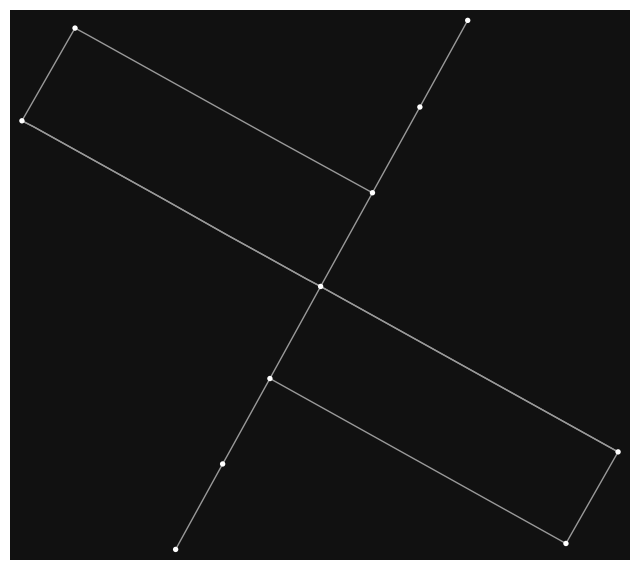

In [42]:
fig, ax = ox.plot.plot_graph(G, node_size=15)

In [87]:
for i in G.nodes():
    print(i)

42432700
42435654
42435657
42435660
42435663
42435671
42437363
42437368
42439972
42445011
5849918504
